# DESCRIPTIVE ANALYSIS

## Background

This slide its the requirement in order to getting the scholarship from Iykra data fellowship program. Hope this slide meet your requirements.
Enjoy !

# Overview

We begin with the overview from this slide. After downloading the data based on instructions in iykra web. The outline as follows:

* ## 1. Read the Data
* ## 2. Plotting the Data
* ## 3. Summary Data
* ## 4. Correlation Analysis
* ## 5. Regression Analysis
* ## 6. Summary

# 1. Read the Data

The data is downloaded from iykra website via ftp server : IP :  35.197.156.161.
This data is transactional data from burger outlet

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
#plotting 
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [56]:
from IPython.display import display,HTML

CSS = """
.output {
    flex-direction : row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [5]:
data = pd.read_csv('Static Dataset Transaction - Burger Star (Outlet A).csv')

In [6]:
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


In [7]:
data = data.sort_values(['Amount Burger','Amount Drink'], ascending = False)

# The data is consists of several feature as follows :
* Transaction time
* Burger type
* Burger code
* Burger amount
* Drink type
* Drink code
* Drink Amount
* Gender
* Payment Method

Here is the metadata that given by default from the csv file. On the next session, We have to modify some type of feature with domain knowledge that we have. For instance, Gender have to be categorical one (or object). This session is to get a proper intuition and interpretation from the data.

In [8]:
data.dtypes

Timestamp        object
Type Burger      object
Code Burger       int64
Amount Burger     int64
Type Drink       object
Code Drink        int64
Amount Drink      int64
Gender            int64
Payment          object
dtype: object

### **For the following session, we plot the data to get the sense of the data and know what analysis we have to create**

# 2. Plotting the data

In [9]:
data['hour'] = data['Timestamp'].str[:2].astype(int)
data['trx'] = 1

In [66]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

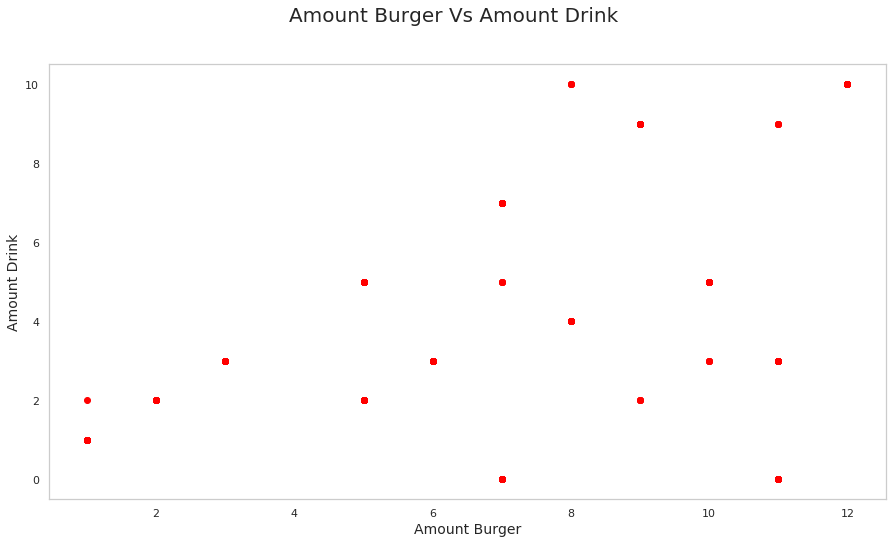

In [71]:
fig = plt.figure(figsize=(15,8))
plt.scatter(data['Amount Burger'], data['Amount Drink'], color='red')
fig.suptitle('Amount Burger Vs Amount Drink', fontsize=20)
plt.xlabel('Amount Burger', fontsize=14)
plt.ylabel('Amount Drink', fontsize=14)
plt.grid(False)
plt.show();

From the chart above, we hardly found the linear relationship between Amount Drink and Amount Burger. Since The amount of burger does not change linearly as amount drink change. But we know that, sum of the customers order more than one burger for one drink. It can be customer bring their own drink, or just take away order. For further, may be we can create the cross selling package for increase the revenue of this outlet

Next, we want to see the composition of the burger type by number of transactions. For further research, we can conduct upselling or crosseling by the type of burger

# Aggregating the data based on the type of burger

In [74]:
#Type burger yang paling banyak dibeli
burger = data.groupby(['Type Burger'])['trx'].sum().reset_index().sort_values(['trx'],ascending=False).reset_index(drop=True)
sumburger = sum(burger['trx'])
burger['pct'] = (100. * burger['trx']/sumburger).round(1).astype(str) + '%'

display(burger)
import plotly.express as px
fig = px.bar(burger, x='Type Burger', y='trx',
             #hover_data=['gender'], color='gender',
             labels={'Type Burger':'Type of Burger','trx':'Number of Transactions'}, height=400)
fig.show()

,Type Burger,trx,pct
0,Beef burger,116,37.2%
1,Chicken burger,71,22.8%
2,Double cheese burger,69,22.1%
3,Cheese burger,56,17.9%


In [75]:
#Type burger yang paling banyak dibeli
burger = data.groupby(['Type Burger'])['Amount Burger'].sum().reset_index().sort_values(['Amount Burger'],ascending=False).reset_index(drop=True)
sumburger = sum(burger['Amount Burger'])
burger['pct'] = (100. * burger['Amount Burger']/sumburger).round(1).astype(str) + '%'

display(burger)
import plotly.express as px
fig = px.bar(burger, x='Type Burger', y='Amount Burger',
             #hover_data=['gender'], color='gender',
             labels={'Type Burger':'Type of Burger','Amount Burger':'Amount of Burger'}, height=400)
fig.show()

,Type Burger,Amount Burger,pct
0,Beef burger,526,27.0%
1,Chicken burger,489,25.1%
2,Cheese burger,487,25.0%
3,Double cheese burger,448,23.0%


From the table above, Beef Burger is the most popular burger in this outlet by 37% of total transactions, also by the size of amount burger ordered as well, Beef burger has the most burger that customers ordered by 27% of total Amount Burger.

In [15]:
datahour = data.groupby(['hour'])['Amount Burger'].sum().reset_index().sort_values(by=['hour'], ascending = True)

We define hour as two first string in timestamp feature. Since, we want to know the relationship between hour transactions and the amount of burger ordered by customers, also timestamp future is too rigit to be aggregated

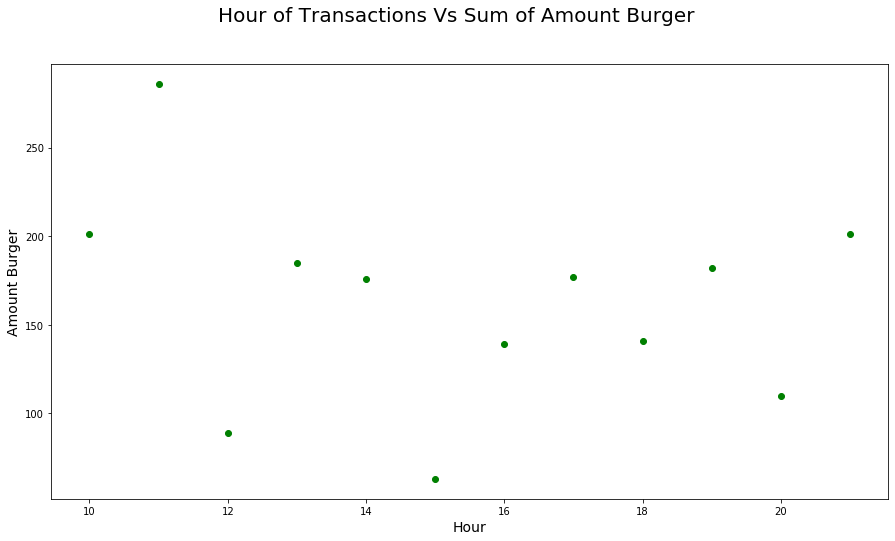

In [16]:
fig = plt.figure(figsize=(15,8))
plt.scatter(datahour['hour'], datahour['Amount Burger'], color='green')
fig.suptitle('Hour of Transactions Vs Sum of Amount Burger', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Amount Burger', fontsize=14)
plt.grid(False)
plt.show();

Based on the scatter plot above, the maximum that the amount burger ordered by customers is at 11 a.m, and the minimum
amount of burger ordered by the customers is at 3 p.m.

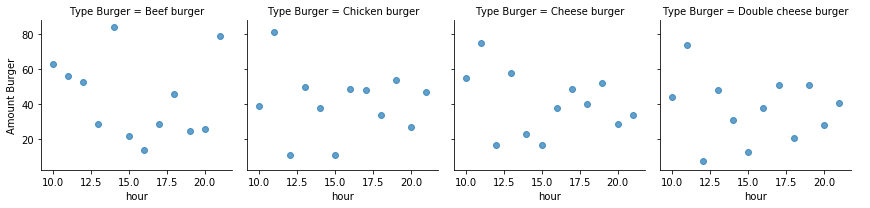

In [17]:
timedata = data.groupby(['Type Burger','hour'])['Amount Burger'].sum().reset_index().sort_values(['Amount Burger','hour'], ascending = False).reset_index(drop=True)
g = sns.FacetGrid(timedata, col="Type Burger")
g.map(plt.scatter, "hour", "Amount Burger", alpha=.7)
g.add_legend();

In [18]:
datahourdrink = data.groupby(['hour'])['Amount Drink'].sum().reset_index().sort_values(by=['hour'], ascending = True)

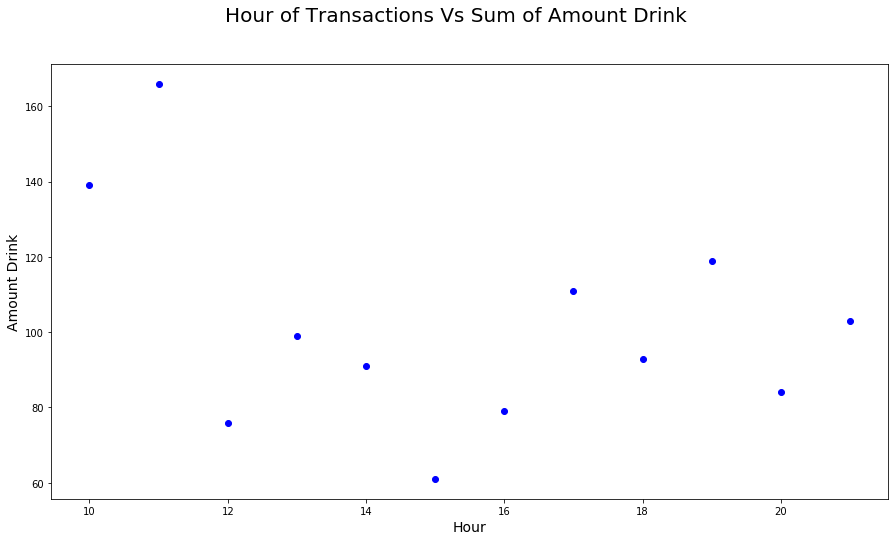

In [19]:
fig = plt.figure(figsize=(15,8))
plt.scatter(datahourdrink['hour'], datahourdrink['Amount Drink'], color='blue')
fig.suptitle('Hour of Transactions Vs Sum of Amount Drink', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Amount Drink', fontsize=14)
plt.grid(False)
plt.show();

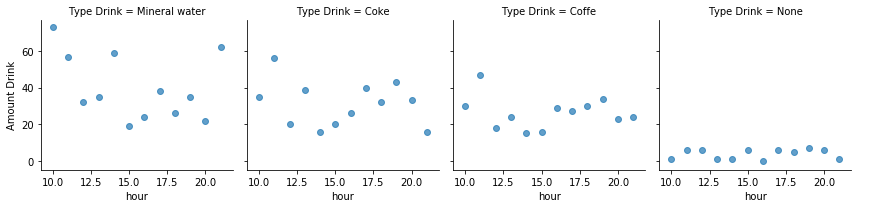

In [20]:
timedatadrink = data.groupby(['Type Drink','hour'])['Amount Drink'].sum().reset_index().sort_values(['Amount Drink','hour'], ascending = False).reset_index(drop=True)
g = sns.FacetGrid(timedatadrink, col="Type Drink")
g.map(plt.scatter, "hour", "Amount Drink", alpha=.7)
g.add_legend();

By aggregating sum of the amount burger, we can see the 11 a.m is the peak hour for the outlet that sold the largest amount of all burger type. On the next pages, we can see what the most popular Type of burger by the hour of the transactions.

Here are the snapshot result from aggregating sum of the data based on the hour feature that created previously.

In [21]:
gendertrx = data.groupby(['Gender'])['trx'].sum().reset_index()
fig = go.Figure(data=[go.Pie(labels=['gender0', 'gender1'], values=gendertrx['trx'])])
fig.show()

In [22]:
genderbtype = data.groupby(['Gender','Type Burger'])['trx'].sum().reset_index()
gender0 = genderbtype[genderbtype['Gender']==0]
gender1 = genderbtype[genderbtype['Gender']==1]

In [59]:
from plotly.subplots import make_subplots

labels = genderbtype['Type Burger'].tolist()

fig = make_subplots(rows=1, cols=2,specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=gender0['trx'].tolist(),name = 'gender0'),1, 1)
fig.add_trace(go.Pie(labels=labels, values=gender1['trx'].tolist(),name = 'gender1'),1, 2)
fig.update_layout(title_text="Gender Vs Type of Burger Transactions")
fig.show();

# PAYMENT

In [24]:
payment = data.groupby(['Payment'])['Timestamp'].count().reset_index()
payment.columns = ['Payment','sumtrx']
payment = payment.sort_values(['sumtrx'],ascending = False).reset_index(drop=True)

In [25]:
import plotly.express as px
fig = px.bar(payment, x='Payment', y='sumtrx',
             #hover_data=['gender'], color='gender',
             labels={'Payment':'Payment Method','sumtrx':'Number of Transactions'}, height=400)
fig.show()

In [26]:
payfood = data.groupby(['Payment','Type Burger'])['trx'].sum().reset_index()
payfood = payfood.sort_values(['Payment','trx'], ascending=False).reset_index(drop=True)

In [27]:
fig = px.bar(payfood, x='Payment', y='trx',
             hover_data=['Type Burger'], color='Type Burger',
             labels={'Payment':'Payment Method','Amount Burger':'Number of Transactions'}, height=400)
fig.show()

In [28]:
fig = go.Figure()

fig = px.histogram(data, x='Amount Drink',
             hover_data=['Gender'],color='Gender',
             labels={'count':'Count of Burger','Amount Drink':'Amount of Drink'}, height=400)
fig.update_layout(
    margin=dict(l=80, r=30, t=30, b=30),
    paper_bgcolor="LightSteelBlue",
)

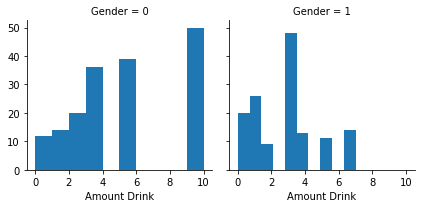

In [29]:
g = sns.FacetGrid(data, col="Gender")
g.map(plt.hist, "Amount Drink");

In [30]:
data[['Amount Burger','Amount Drink']].describe()

,Amount Burger,Amount Drink
count,312.00000,312.000000
mean,6.25000,3.913462
std,3.45969,2.960981
min,1.00000,0.000000
25%,3.00000,2.000000
50%,6.00000,3.000000
75%,9.00000,5.000000
max,12.00000,10.000000


In [31]:
data[data['Code Burger']==1][['Amount Burger','Amount Drink']].describe()
data[data['Code Burger']==2][['Amount Burger','Amount Drink']].describe()

,Amount Burger,Amount Drink
count,116.000000,116.000000
mean,4.534483,3.094828
std,3.386498,2.617594
min,1.000000,0.000000
25%,1.000000,1.000000
50%,4.500000,3.000000
75%,7.000000,3.000000
max,11.000000,10.000000


,Amount Burger,Amount Drink
count,71.000000,71.000000
mean,6.887324,3.450704
std,2.905902,3.540737
min,3.000000,0.000000
25%,3.000000,0.000000
50%,7.000000,3.000000
75%,9.000000,5.000000
max,11.000000,9.000000


In [32]:
data[data['Code Burger']==3][['Amount Burger','Amount Drink']].describe()
data[data['Code Burger']==4][['Amount Burger','Amount Drink']].describe()

,Amount Burger,Amount Drink
count,56.000000,56.000000
mean,8.696429,6.232143
std,3.587451,3.202221
min,3.000000,3.000000
25%,5.000000,3.000000
50%,11.000000,5.000000
75%,12.000000,10.000000
max,12.000000,10.000000


,Amount Burger,Amount Drink
count,69.000000,69.000000
mean,6.492754,3.884058
std,2.410902,1.231167
min,3.000000,2.000000
25%,5.000000,3.000000
50%,5.000000,4.000000
75%,8.000000,5.000000
max,10.000000,5.000000


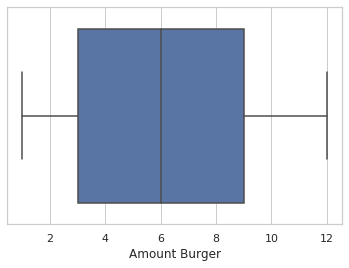

In [33]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Amount Burger"])

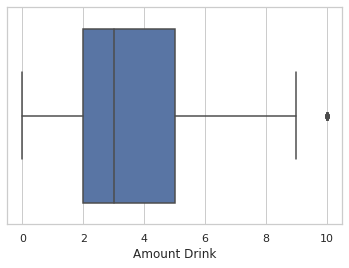

In [34]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Amount Drink"])

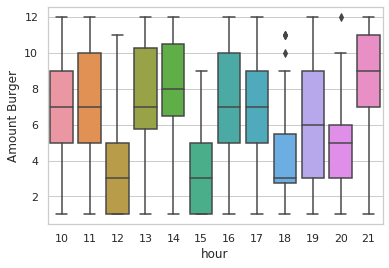

In [35]:
ax = sns.boxplot(x="hour", y="Amount Burger", data=data)

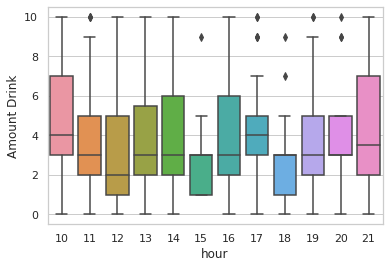

In [36]:
ax = sns.boxplot(x="hour", y="Amount Drink", data=data)

# Correlation between Amount burger & Amount drink

In [37]:
data['Gender0'] = (data['Gender']==1).astype(int)
data[['Amount Burger','Amount Drink','Gender0']].corr()

,Amount Burger,Amount Drink,Gender0
Amount Burger,1.000000,0.495856,-0.099282
Amount Drink,0.495856,1.000000,-0.345939
Gender0,-0.099282,-0.345939,1.000000


In [38]:
data['Gender1'] = (data['Gender']==0).astype(int)
data[['Amount Burger','Amount Drink','Gender1']].corr()

,Amount Burger,Amount Drink,Gender1
Amount Burger,1.000000,0.495856,0.099282
Amount Drink,0.495856,1.000000,0.345939
Gender1,0.099282,0.345939,1.000000


# Correlation between Amount Burger & Hour

In [39]:
data[['Amount Burger','hour']].corr()
data[['Amount Drink','hour']].corr()

,Amount Burger,hour
Amount Burger,1.000000,-0.014541
hour,-0.014541,1.000000


,Amount Drink,hour
Amount Drink,1.000000,-0.027782
hour,-0.027782,1.000000


In [40]:
data['food'] = data['Type Burger'] +','+data['Type Drink']
data['sumitem'] = data['Amount Burger'] + data['Amount Drink']
data['countrx'] = 1

# Correlation between Sum Item & Hour

In [41]:
data[['sumitem','hour']].corr()

,sumitem,hour
sumitem,1.00000,-0.02385
hour,-0.02385,1.00000


In [42]:
# Paket burger yang paling banyak dibeli
foodgroup = data.groupby(['food','hour','Gender'])['sumitem'].sum().reset_index().sort_values(['sumitem'],ascending = False).reset_index(drop=True)
sumfoodgroup = sum(foodgroup['sumitem'])
foodgroup['pct'] = (foodgroup['sumitem']/sumfoodgroup)
foodgroup.head()

# Paket burger yang paling banyak dibeli
foodgrouptrx = data.groupby(['food','hour','Gender'])['countrx'].sum().reset_index().sort_values(['countrx'],ascending = False).reset_index(drop=True)
sumfoodgrouptrx = sum(foodgrouptrx['countrx'])
foodgrouptrx['pct'] = (foodgrouptrx['countrx']/sumfoodgrouptrx)
foodgrouptrx.head()

,food,hour,Gender,sumitem,pct
0,"Cheese burger,Coke",11,0,94,0.029644
1,"Beef burger,Mineral water",10,1,74,0.023336
2,"Cheese burger,Coke",17,0,72,0.022706
3,"Cheese burger,Coke",19,0,72,0.022706
4,"Beef burger,Mineral water",11,1,68,0.021444


,food,hour,Gender,countrx,pct
0,"Beef burger,Mineral water",10,1,7,0.022436
1,"Chicken burger,Coffe",18,0,6,0.019231
2,"Beef burger,Mineral water",11,1,6,0.019231
3,"Beef burger,Mineral water",12,1,6,0.019231
4,"Beef burger,Mineral water",14,1,6,0.019231


In [43]:
fig = px.bar(foodgroup, x='hour', y='sumitem',
             #hover_data=['gender'], color='gender',
             labels={'hour':'Time of Transactions','sumitem':'Sum of Pacakage'}, height=400)
fig.show()

In [44]:
fig = px.bar(foodgrouptrx, x='hour', y='countrx',
             #hover_data=['gender'], color='gender',
             labels={'hour':'Time of Transactions','countrx':'Number of Transactions'}, height=400)
fig.show()

In [45]:
import plotly.express as px
fig = px.bar(foodgroup, x='food', y='sumitem',
             #hover_data=['gender'], color='gender',
             labels={'food':'Food Package','sumitem':'Sum of Burger & Drinks'}, height=600)
fig.show()

In [46]:
import plotly.express as px
fig = px.bar(foodgrouptrx, x='food', y='countrx',
             #hover_data=['gender'], color='gender',
             labels={'food':'Food Package','countrx':'Count of Transactions'}, height=600)
fig.show()

In [47]:
# Paket burger berdasarkan gender
foodgender = data.groupby(['food','Gender'])['sumitem'].sum().reset_index().sort_values(['sumitem','Gender'],ascending = False).reset_index(drop=True)
sumfoodgender = sum(foodgender['sumitem'])
foodgender['pct'] = (foodgender['sumitem']/sumfoodgender)
foodgender

,food,Gender,sumitem,pct
0,"Cheese burger,Coke",0,588,0.185430
1,"Beef burger,Mineral water",1,507,0.159886
2,"Chicken burger,Coffe",0,420,0.132450
3,"Double cheese burger,Mineral water",0,368,0.116052
4,"Cheese burger,Coke",1,248,0.078209
5,"Double cheese burger,Coffe",0,192,0.060549
6,"Chicken burger,None",1,182,0.057395
7,"Beef burger,Mineral water",0,160,0.050457
8,"Double cheese burger,Mineral water",1,156,0.049196
9,"Chicken burger,None",0,132,0.041627


In [48]:
import plotly.express as px
fig = px.bar(foodgender, x='food', y='sumitem',
             hover_data=['Gender'], color='Gender',
             labels={'food':'Food Package','sumitem':'Number of Transactions'}, height=600)
fig.show()

For the very first suggestions, we can't already decide to make a proper crosseling burger product since the transactions is just sligthly diffrent. Need to explore more feature. We just can see the beef burger is the most popular burger in this outlet.

Yes, the diffrent is clearly view on the chart above. From the previous chart we know that the beef burger is the most popular burger at
the outlet. But if we combine with the drinks, the cheese burger is the most burger that the customers want. So, we suggest the package of combination
between cheese burger with coke and beef burger with the most profitable drink (call it Beef Cheese package). Since the beef burger is the most burger that customers want, no matter the drink
(based on the transactional data).Then the customers can choose the type of drink whenever he/she want. The amount of combinations can't decide yet since we don't know the price and the profitability for each food (burger & drink) yet.

For further scheme, we can offer the crossseling package based on the gender of the customers. Then we can make the cross selling / up selling more effective (Since we know the target of the customers)

In [49]:
gender = data.groupby(['Gender'])['sumitem'].sum().reset_index()
gender

,Gender,sumitem
0,0,1950
1,1,1221


Clearly show from the chart above that the gender 0 are the most customers gender type to buy the Cheese burger and coke. Also with the beef burger with no drinks.
So, we can offer more the cross selling in the previous slide to gender 0. Maybe with the gift item specifically for gender 0. For gender 1, we can offer the beef burger + chicken burger with the most profitable drink. Since we knew from the chart above, the gender 1 most likely to buy the beef burger and chicken burger

Then, we also can combine the package based on the peak hour of the transaction made. We can offer the package at the specific time

In [50]:
data['hour'] = data['Timestamp'].str[:2]
peak = data.groupby(['hour'])['sumitem'].sum().reset_index().sort_values(['sumitem'],ascending=False)
peak

,hour,sumitem
1,11,452
0,10,340
11,21,304
9,19,301
7,17,288
3,13,284
4,14,267
8,18,234
6,16,218
10,20,194


In [51]:
fig = px.bar(peak, x='hour', y='sumitem',
             #hover_data=['Type Burger'], color='Type Burger',
             labels={'hour':'Time Transactions (hour)','sumitem':'Sum of item transactions'}, height=400)
fig.show()

In [52]:
data['trx'] = 1
peakhourbin = data.groupby(['hour','food'])['Amount Burger'].sum().reset_index().sort_values(['Amount Burger'],ascending=False).reset_index(drop=True)
peakhourbin.head()

,hour,food,Amount Burger
0,11,"Cheese burger,Coke",75
1,10,"Beef burger,Mineral water",60
2,14,"Beef burger,Mineral water",58
3,13,"Cheese burger,Coke",58
4,21,"Beef burger,Mineral water",56


We can offer the Beef Cheese package at the 10-14 for the 

In [53]:
paygen = data.groupby(['Payment','Gender'])['sumitem'].sum().reset_index()
paygen

,Payment,Gender,sumitem
0,DANA,0,390
1,DANA,1,288
2,GOPAY,0,350
3,GOPAY,1,306
4,LINK AJA,0,441
5,LINK AJA,1,219
6,OVO,0,418
7,OVO,1,193
8,TUNAI,0,351
9,TUNAI,1,215


In [54]:
peak.describe()

,sumitem
count,12.000000
mean,264.250000
std,86.544917
min,124.000000
25%,212.000000
50%,275.500000
75%,301.750000
max,452.000000


In [55]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')